In [1]:
import os

import requests
import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    FEAR_GREED_DATA_FILE_PATH,
    TRAIN_START_DATE,
    CURRENT_DATE)

In [2]:
fear_greed_data = pd.DataFrame()

if os.path.exists(FEAR_GREED_DATA_FILE_PATH):
    print(f"The Fear-Greed data is available locally. Reading the file: {FEAR_GREED_DATA_FILE_PATH}")
    fear_greed_data = pd.read_csv(FEAR_GREED_DATA_FILE_PATH)

else: 
    print(f'Fetching online ohlcv data from {TRAIN_START_DATE} till {CURRENT_DATE}')

    def get_fear_greed_index():
        url = 'https://api.alternative.me/fng/?limit=0'
        response = requests.get(url)
        data = response.json()
        df = pd.DataFrame(data['data'])
        df['timestamp'] = pd.to_numeric(df['timestamp'])  # Ensure the timestamp is numeric
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        df['date'] = df['timestamp'].dt.date  # Create a new 'date' column
        df = df.drop(columns=['timestamp'])  # Drop the 'timestamp' column
        return df

    # Fetch the data
    fear_greed_data = get_fear_greed_index()
    fear_greed_data.to_csv(FEAR_GREED_DATA_FILE_PATH, index=False)

fear_greed_data.head(20)

The Fear-Greed data is available locally. Reading the file: ../data/fear_greed_index.csv


,value,value_classification,time_until_update,date
0,34,Fear,51122.0,2024-08-04
1,37,Fear,NaN,2024-08-03
2,57,Greed,NaN,2024-08-02
3,52,Neutral,NaN,2024-08-01
4,61,Greed,NaN,2024-07-31
5,67,Greed,NaN,2024-07-30
6,74,Greed,NaN,2024-07-29
7,71,Greed,NaN,2024-07-28
8,72,Greed,NaN,2024-07-27
9,68,Greed,NaN,2024-07-26


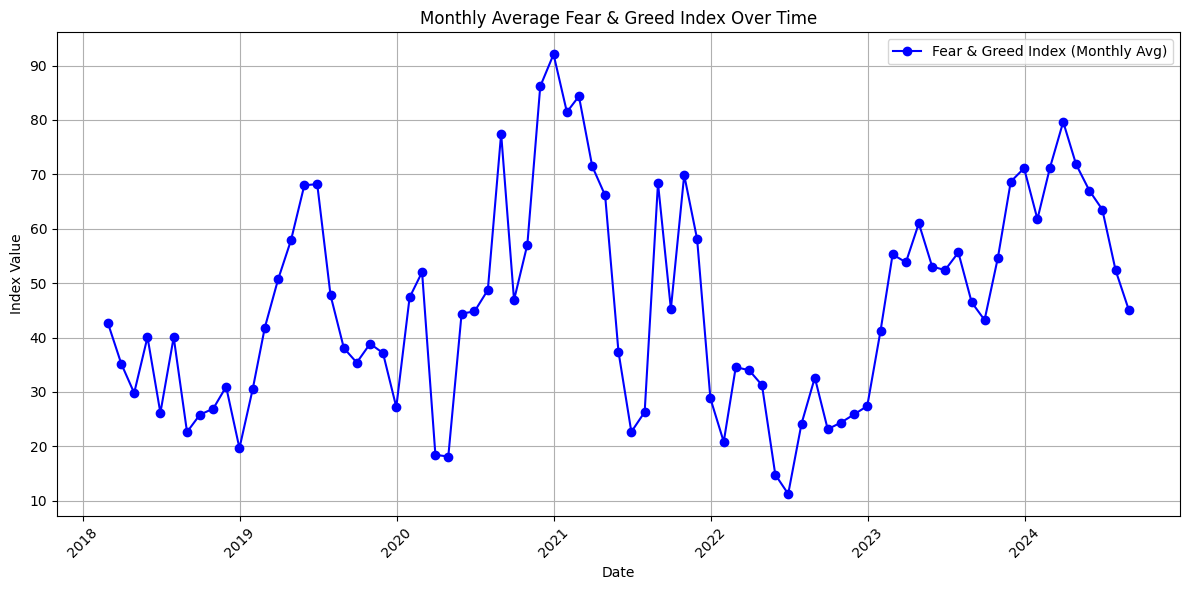

In [3]:
# Reset index and convert date and value columns to appropriate types
fear_greed_data.reset_index(inplace=True)
fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'])
fear_greed_data['value'] = pd.to_numeric(fear_greed_data['value'], errors='coerce')

# Remove non-numeric columns before resampling
numeric_data = fear_greed_data[['date', 'value']]

# Set date as index and resample to get monthly averages
numeric_data.set_index('date', inplace=True)
monthly_avg = numeric_data.resample('ME').mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the monthly average Fear & Greed index values
plt.plot(monthly_avg['date'], monthly_avg['value'], marker='o', linestyle='-', color='b', label='Fear & Greed Index (Monthly Avg)')

# Formatting the plot
plt.title('Monthly Average Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()